# Análisis Exploratorio de Datos - Proyecto Final Python

Para este proyecto, se analizarán las cinco empresas colombianas cotizadas en la bolsa de valores de Nueva York. En esta primera fase, se descargaron los datos históricos del comportamiento de las acciones durante los últimos cinco años de Yahoo Finance. Las empresas seleccionadas fueron:

* Ecopetrol.
* Bancolombia.
* Grupo Aval.
* Avianca.
* Tecnoglass.

Para la fase final, se espera conectar el dashboard a la API de FinnHub para tener los datos más recientes, y descargar esta información en la base de datos de Heroku Postgres. Por ahora, continuemos con el análisis exploratorio de los datos.

Primero, carguemos los modulos que necesitamos:

In [45]:
#Modulos nativos de Python
from datetime import datetime, timedelta
from time import mktime
import warnings

#Modulos de visualización
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#Modulos para gestionar dataframes, cálculos con vectores y matrices
import numpy  as np
import pandas as pd

#Modulos para las pruebas estadísticas para series de tiempo
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

warnings.filterwarnings("ignore")

Configuremos ahora el tema que se usará en las gráficas.

In [36]:
sns.set_theme()
sns.set_context("paper")

Ahora cargaremos los archivos descargados de Yahoo Finance para cada una de las acciones:

In [3]:
#Paths relativos para los archivos de cada acción
ec_path = "./files/EC.csv"  #Ecopetrol
aval_path = "./files/AVAL.csv"  #Grupo AVAL
bc_path = "./files/CIB.csv"  #Grupo Bancolombia
tgls_path = "./files/TGLS.csv"  #Tecnoglass
av_path = "./files/AVHOQ.csv"  #Avianca

#Leyendo los archivos csv con pandas
ec_df = pd.read_csv(ec_path)
aval_df = pd.read_csv(aval_path)
bc_df = pd.read_csv(bc_path)
tgls_df = pd.read_csv(tgls_path)
av_df = pd.read_csv(av_path)

La información descargada de Yahoo Finance contiene el comportamiento diario de cada acción durante los últimos cinco años. Contiene la información del precio de apertura, precio máximo diario, precio mínimo diario, precio de cierre, precio ajustado de cierre y el volumen diario.

In [17]:
ec_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-23,8.23,8.30,8.17,8.24,6.468052,705900
1,2016-11-25,8.16,8.26,8.12,8.14,6.389557,292300
2,2016-11-28,8.18,8.28,8.13,8.16,6.405255,823500
3,2016-11-29,7.98,8.05,7.84,7.85,6.161919,756900
4,2016-11-30,8.25,8.63,8.24,8.56,6.719238,2432600


Lo primero, es realizar un análisis básico, para esto usaremos la función describe de pandas, para generar las medidas de tendencia central más importantes para cada dataframe.

In [4]:
ec_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,14.888998,15.096598,14.678466,14.884062,13.086238,1.032115e+06
std,4.641978,4.704109,4.576512,4.636175,3.823481,5.669295e+05
min,6.720000,7.260000,6.280000,6.680000,6.067657,1.410000e+05
25%,10.722500,10.912500,10.522500,10.772500,9.840018,6.503500e+05
50%,13.690000,13.895000,13.520000,13.685000,13.441117,9.081000e+05
75%,18.757500,18.969999,18.527501,18.757500,16.146405,1.256050e+06
max,27.650000,27.959999,27.160000,27.650000,22.768551,5.466800e+06


In [5]:
aval_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,7.162472,7.240967,7.074305,7.155847,6.410450,1.890145e+05
std,1.443997,1.441521,1.441357,1.446480,1.076286,4.567442e+05
min,3.350000,3.560000,3.320000,3.340000,3.129758,1.510000e+04
25%,5.990000,6.030000,5.892500,5.980000,5.816238,6.550000e+04
50%,7.610000,7.680000,7.520000,7.600000,6.648620,1.113000e+05
75%,8.357500,8.440000,8.250000,8.347500,7.205285,2.030750e+05
max,9.460000,9.510000,9.410000,9.450000,8.262019,1.335120e+07


In [6]:
bc_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,40.122377,40.607512,39.639420,40.127011,37.698578,3.433778e+05
std,8.529352,8.533633,8.528667,8.555376,7.711684,2.406611e+05
min,17.070000,17.570000,16.270000,16.570000,15.941309,3.610000e+04
25%,32.992501,33.390000,32.612500,33.012499,32.320586,1.901250e+05
50%,40.695000,41.225001,40.174999,40.685000,38.050610,2.840500e+05
75%,47.039999,47.585000,46.567500,47.030001,43.285953,4.136500e+05
max,55.959999,56.099998,55.340000,55.939999,53.817543,2.583700e+06


In [7]:
tgls_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,9.623831,9.828307,9.407862,9.617003,8.984705,9.838132e+04
std,5.155329,5.308402,4.992561,5.154967,5.231406,1.901291e+05
min,2.440000,2.540000,2.150000,2.290000,2.231945,4.000000e+02
25%,7.060000,7.170000,6.952500,7.042500,6.454358,1.980000e+04
50%,8.310000,8.500000,8.140000,8.355000,7.722085,3.965000e+04
75%,9.817500,9.917500,9.607500,9.825000,8.675342,9.437500e+04
max,34.320000,34.500000,32.250000,33.490002,33.490002,2.249100e+06


In [8]:
av_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,4.200421,4.282210,4.106447,4.193092,3.924271,1.699653e+05
std,3.077137,3.117416,3.038367,3.080481,2.798658,2.590802e+05
min,0.040000,0.170000,0.040000,0.150000,0.150000,0.000000e+00
25%,0.570000,0.600000,0.485000,0.552500,0.552500,5.480000e+04
50%,4.395000,4.470000,4.250000,4.375000,4.309492,9.165000e+04
75%,7.150000,7.250000,7.045000,7.140000,6.457101,1.817750e+05
max,10.270000,10.910000,10.010000,10.190000,9.134176,2.921600e+06


In [11]:
[av_df.Date.min(), av_df.Date.max()] 

['2016-11-23', '2021-11-22']

In [12]:
[aval_df.Date.min(), aval_df.Date.max()] 

['2016-11-23', '2021-11-22']

In [13]:
[bc_df.Date.min(), bc_df.Date.max()] 

['2016-11-23', '2021-11-22']

In [14]:
[ec_df.Date.min(), ec_df.Date.max()] 

['2016-11-23', '2021-11-22']

In [15]:
[tgls_df.Date.min(), tgls_df.Date.max()] 

['2016-11-23', '2021-11-22']

Observando las medidas de tendencia central para el valor de apertura de las cinco acciones durante los últimos cinco años (desde 2016-11-23 hasta 2021-11-22), podemos observar lo siguiente:

* Para Ecopetrol, el precio medio de apertura fue de US$14.88, con una desviación de US$4.64. Esto implica que el coeficiente de variación es de 0.311. El valor mínimo de apertura en los cinco años analizados fue de US$6.72, y el valor máximo de apertura fue de US$27.65.

* Para el Grupo Aval, el precio medio de apertura fue de US$7.16, con una desviación de US$1.44. Esto implica que el coeficiente de variación es de 0.201. El valor mínimo de apertura en los cinco años analizados fue de US$3.35, y el valor máximo de apertura fue de US$9.46.

* Para el Grupo Bancolombia, el precio medio de apertura fue de US$40.12, con una desviación de US$8.52. Esto implica que el coeficiente de variación es de 0.2123. El valor mínimo de apertura en los cinco años analizados fue de US$17.07, y el valor máximo de apertura fue de US$55.95.

* Para Tecnoglass, el precio medio de apertura fue de US$9.62, con una desviación de US$5.15. Esto implica que el coeficiente de variación es de 0.535. El valor mínimo de apertura en los cinco años analizados fue de US$2.44, y el valor máximo de apertura fue de US$34.32.

* Por último, para Avianca, el precio medio de apertura fue de US$4.2, con una desviación de US$3.077. Esto implica que el coeficiente de variación es de 0.736. El valor mínimo de apertura en los cinco años analizados fue de US$0.04, y el valor máximo de apertura fue de US$10.27.

Podemos observar que los coeficientes de variación de todas las acciones son menores que 1, así que se podrían considerar que el precio de apertura no tiene una alta varianza. Sin embargo, hay que tener cuidado con este resultado, ya que estamos agregando cinco años. Pudieron haber meses donde el coeficiente de variación perfectamente pudo haber superado el valor debido a grandes fluctuaciones en el precio de apertura de la acción.

Por esta razón, para revisar series de tiempo, lo mejor es revisar su comportamiento a lo largo del tiempo. Para esto, utilizaremos la función `lineplot` de `seaborn` para graficar el comportamiento de cada acción. En este caso, usaremos mejor el precio de cierre diario.

Antes de graficar, convertiremos la columna de *Date* a tipo `datetime`, para poder realizar operaciones más fácilmente.

In [22]:
#Convirtiendo las fechas a tipo DateTime
ec_df.Date = ec_df.Date.apply(lambda x: datetime.strptime(str(x).strip(), '%Y-%m-%d')) 
bc_df.Date = bc_df.Date.apply(lambda x: datetime.strptime(str(x).strip(), '%Y-%m-%d'))
av_df.Date = av_df.Date.apply(lambda x: datetime.strptime(str(x).strip(), '%Y-%m-%d'))
aval_df.Date = aval_df.Date.apply(lambda x: datetime.strptime(str(x).strip(), '%Y-%m-%d'))
tgls_df.Date = tgls_df.Date.apply(lambda x: datetime.strptime(str(x).strip(), '%Y-%m-%d'))

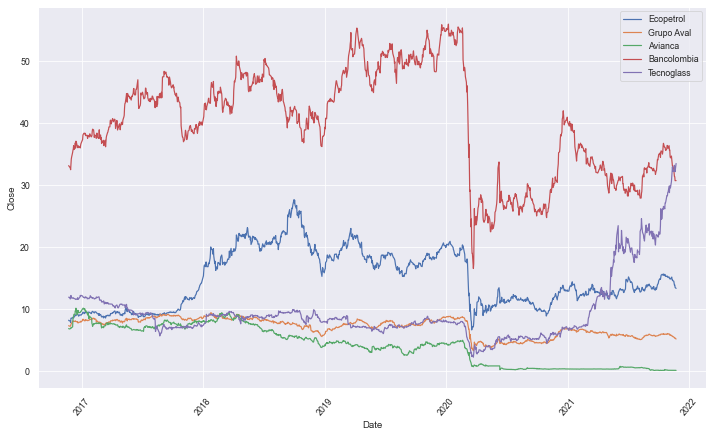

In [37]:
#Graficando el precio de cierre diario de cada acción
plt.figure(figsize = (10,6))
sns.lineplot(x=ec_df.Date, y=ec_df.Close)
sns.lineplot(aval_df.Date,aval_df.Close)
sns.lineplot(av_df.Date,av_df.Close)
sns.lineplot(bc_df.Date,bc_df.Close)
sns.lineplot(tgls_df.Date,tgls_df.Close)

plt.legend(labels=["Ecopetrol","Grupo Aval","Avianca", "Bancolombia", "Tecnoglass"])
plt.tight_layout()
plt.xticks(rotation=50)
plt.show()

Como se observa en la gráfica, las diferentes acciones han tenido diferentes comportamientos en estos últimos cinco años. Como comportamiento común entre todas, se observa una caída en las acciones aproximadamente en marzo de 2020. Esto tiene sentido, ya que concuerda con el comienzo de la pandemia del Coronavirus, la cual tuvo un alto impacto en los precios de las acciones. Otras observaciones son las siguientes:

* Para la acción del Grupo Bancolombia, que fue la que tuvo el mayor precio promedio a lo largo de los cinco años, se observa que tuvo un crecimiento sostenido desde finales de 2016 hasta inicios de 2020, luego de la caída por la pandemia, empezó a recuperarse hasta alcanzar una precio alrededor de US$40, para luego empezar una tendencia a la baja.

* Para la acción de Ecopetrol, también se observa un comportamiento similar, si bien tuvo un crecimiento desde finales de 2016 hasta 2018, luego experimentó un proceso de estabilización en el precio de US$20, hasta la pandemia, donde cayó y empezó una lenta recuperación.

* Para la acción de Tecnoglass, se observa una tendencia a la baja desde finales de 2016 hasta 2020, donde tiene una fuerte caida por la pandemia. Luego de la pandemia, sufre una recuperación en el precio para en el 2021, dar un salto vertiginoso en el precio, al llegar a su máximo histórico en estos últimos cinco años.

* Para la acción de Grupo Aval, también se observa un comportamiento parecido a la acción de Ecopetrol, pero la estabilización ocurrió entre los US$8 y US$9 dólares. Luego de la pandemia, cayó y empezó una leve recuperación.

* Por último, para la acción de Avianca se observa una tendencia bajista desde finales de 2016 hasta 2020, donde la pandemia le acestó un tremendo golpe, ya que al ser aerolínea, estuvo fuertemente impactada por la situación. Luego de la pandemia la acción prácticamente vale cero, y no muestra signos de recuperación. 

Ahora, verifiquemos si las series de tiempo son estacionarias o no. Para esto, usaremos la prueba de `Dickey-Fuller`. Para hacer uso de esta prueba importamos la función `adfuller` de la clase `statsmodels.tsa.stattools`.

In [40]:
#Prueba de Dickey-Fuller para Ecopetrol
result = adfuller(ec_df.Close)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.169759
p-value: 0.217404


In [41]:
#Prueba de Dickey-Fuller para Grupo aval
result = adfuller(aval_df.Close)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.949745
p-value: 0.309033


In [42]:
#Prueba de Dickey-Fuller para Avianca
result = adfuller(av_df.Close)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.265374
p-value: 0.644861


In [43]:
#Prueba de Dickey-Fuller para Bancolombia
result = adfuller(bc_df.Close)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.270745
p-value: 0.181577


In [44]:
#Prueba de Dickey-Fuller para Tecnoglass
result = adfuller(tgls_df.Close)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 2.511143
p-value: 0.999053


Si consideramos un nivel de significancia del 5%, tenemos entonces que para todos los precios de cierre de las acciones el P-valor es mayor que este nivel, por lo cual, la hipótesis nula no se rechaza. Esto significa que no hay evidencia suficiente para afirmar que las series temporales analizadas son estacionarias. 

Como las series de tiempo no son estacionarias, calculemos las figuras de autocorrelación, para verificar el orden de integración necesario para convertirlas a estacionarias.

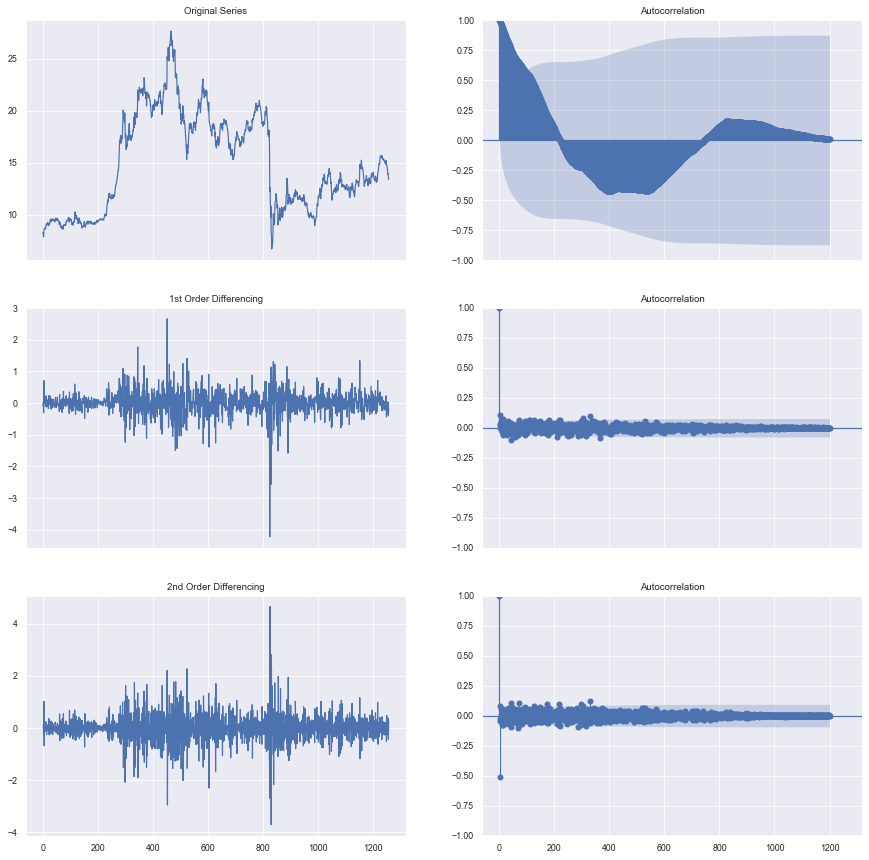

In [56]:
#Graficando la autocorrelación de la serie original de Ecopetrol y sus primeras y segundas derivadas
plt.rcParams.update({'figure.figsize': (15,15)})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(ec_df.Close); axes[0, 0].set_title('Original Series')
plot_acf(ec_df.Close, ax=axes[0, 1], lags = 1200);

axes[1, 0].plot(ec_df.Close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(ec_df.Close.diff().dropna(), ax=axes[1, 1], lags = 1200);

axes[2, 0].plot(ec_df.Close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(ec_df.Close.diff().diff().dropna(), ax=axes[2, 1], lags = 1200);

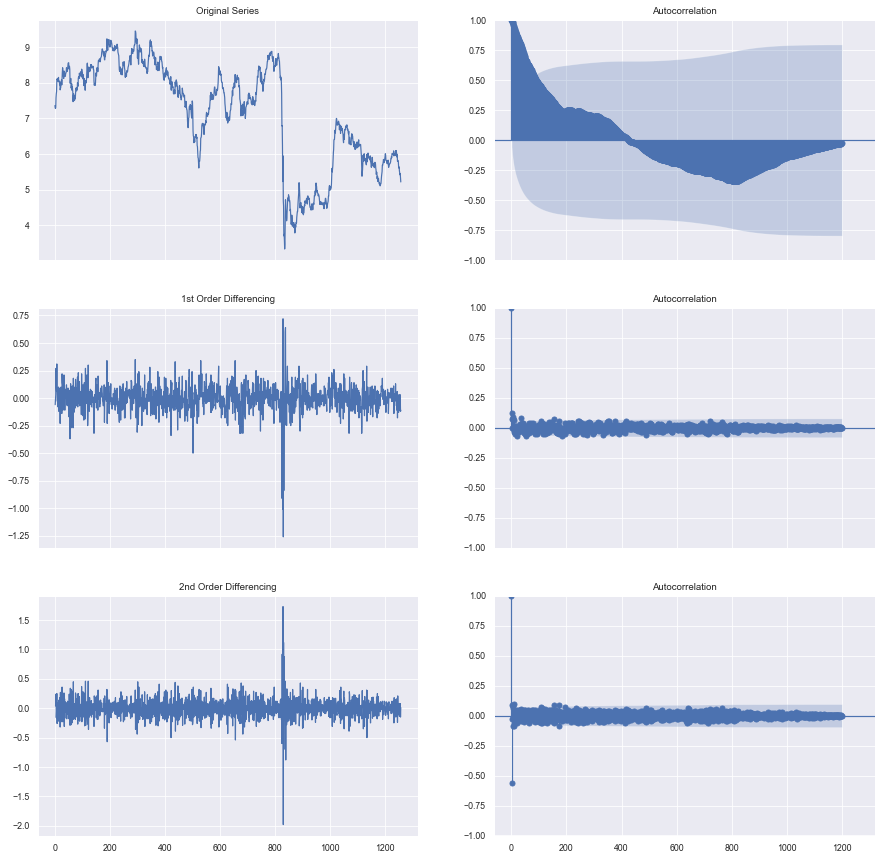

In [57]:
#Graficando la autocorrelación de la serie original de Grupo Aval y sus primeras y segundas derivadas
plt.rcParams.update({'figure.figsize': (15,15)})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(aval_df.Close); axes[0, 0].set_title('Original Series')
plot_acf(aval_df.Close, ax=axes[0, 1], lags = 1200);

axes[1, 0].plot(aval_df.Close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(aval_df.Close.diff().dropna(), ax=axes[1, 1], lags = 1200);

axes[2, 0].plot(aval_df.Close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(aval_df.Close.diff().diff().dropna(), ax=axes[2, 1], lags = 1200);

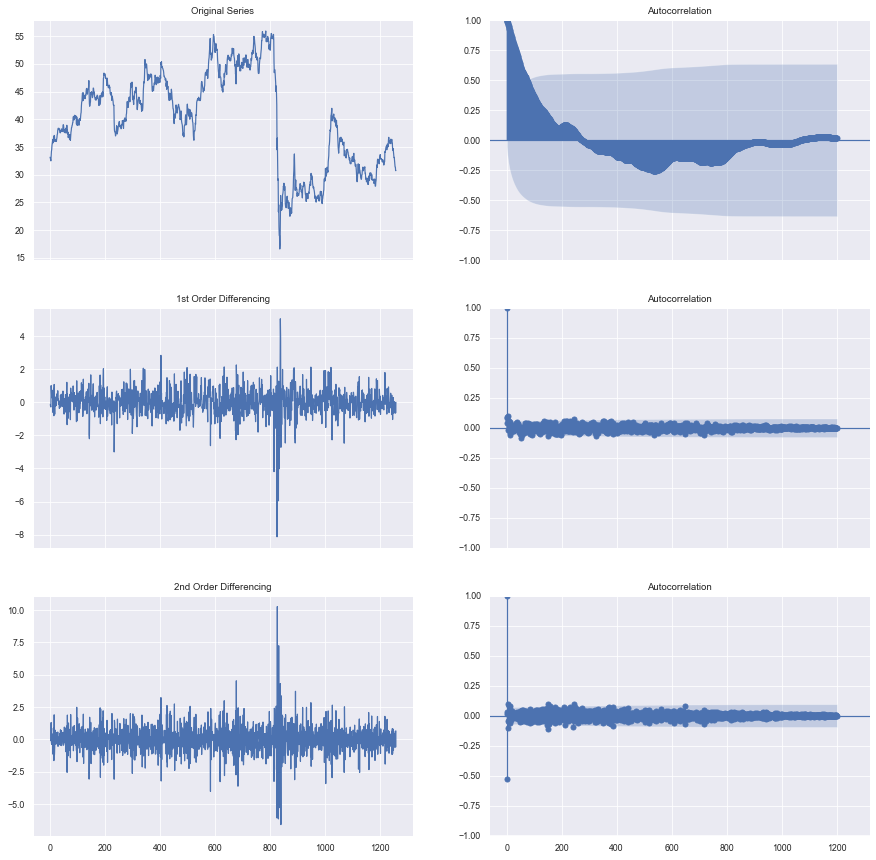

In [58]:
#Graficando la autocorrelación de la serie original de Bancolombia y sus primeras y segundas derivadas
plt.rcParams.update({'figure.figsize': (15,15)})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(bc_df.Close); axes[0, 0].set_title('Original Series')
plot_acf(bc_df.Close, ax=axes[0, 1], lags = 1200);

axes[1, 0].plot(bc_df.Close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(bc_df.Close.diff().dropna(), ax=axes[1, 1], lags = 1200);

axes[2, 0].plot(bc_df.Close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(bc_df.Close.diff().diff().dropna(), ax=axes[2, 1], lags = 1200);

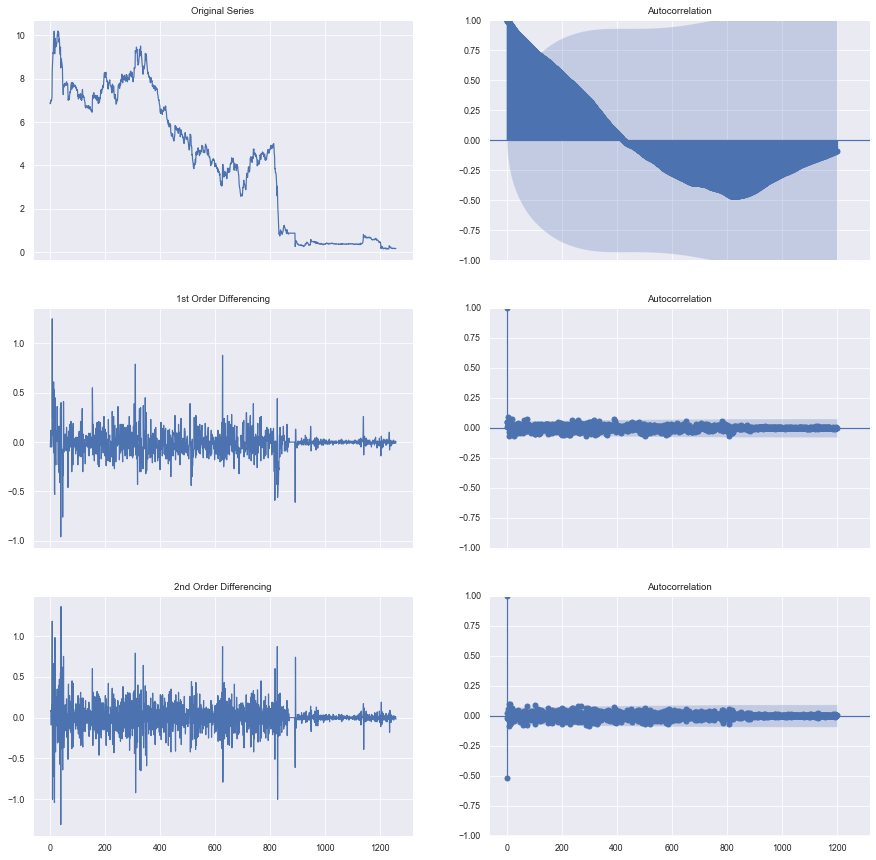

In [59]:
#Graficando la autocorrelación de la serie original de Avianca y sus primeras y segundas derivadas
plt.rcParams.update({'figure.figsize': (15,15)})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(av_df.Close); axes[0, 0].set_title('Original Series')
plot_acf(av_df.Close, ax=axes[0, 1], lags = 1200);

axes[1, 0].plot(av_df.Close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(av_df.Close.diff().dropna(), ax=axes[1, 1], lags = 1200);

axes[2, 0].plot(av_df.Close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(av_df.Close.diff().diff().dropna(), ax=axes[2, 1], lags = 1200);

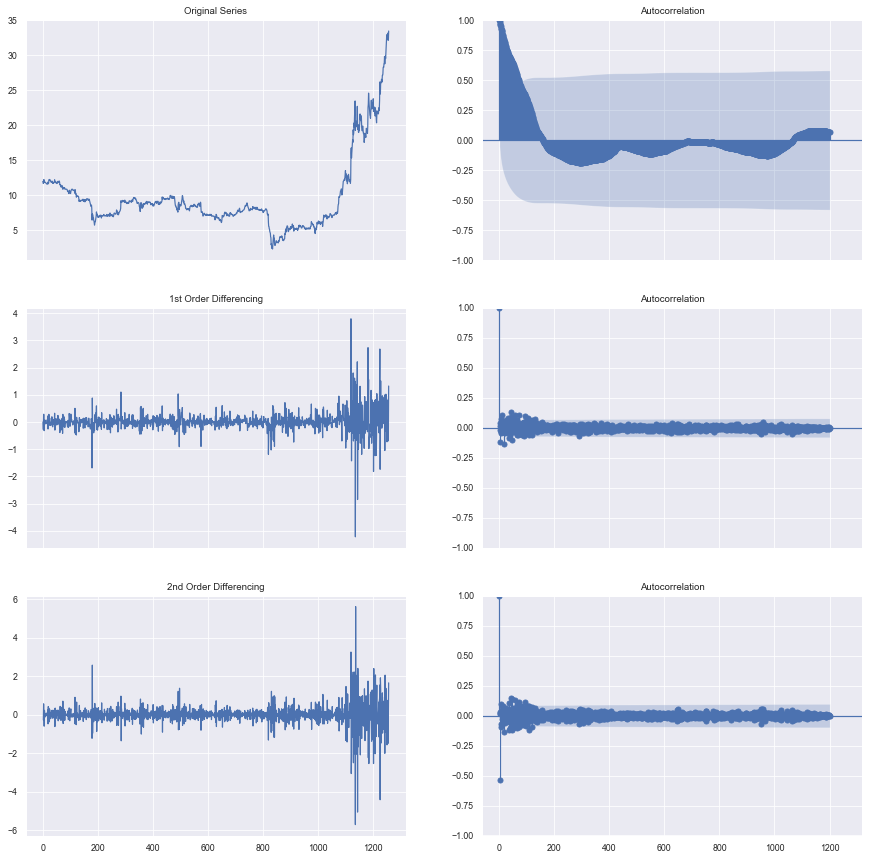

In [60]:
#Graficando la autocorrelación de la serie original de Tecnoglass y sus primeras y segundas derivadas
plt.rcParams.update({'figure.figsize': (15,15)})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(tgls_df.Close); axes[0, 0].set_title('Original Series')
plot_acf(tgls_df.Close, ax=axes[0, 1], lags = 1200);

axes[1, 0].plot(tgls_df.Close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(tgls_df.Close.diff().dropna(), ax=axes[1, 1], lags = 1200);

axes[2, 0].plot(tgls_df.Close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(tgls_df.Close.diff().diff().dropna(), ax=axes[2, 1], lags = 1200);

Se puede observar el decaimiento geométrico en la primera figura de autocorrelación en todas las series de tiempo analizadas, que baja desde la parte positiva con una tendencia lineal. Esto confirma lo observado con la prueba de `Dickey-Fuller`, ya que nos indica que son series de tiempo no estacionarias.

Adicionalmente, no se observan muchas diferencias entre los gráficos de autocorrelación de las primeras y segundas derivadas para cada serie, lo cual indicaría que con la primera derivada es suficiente para transformar los datos para el modelo ARIMA.

Para el proyecto, se realizarán modelos ARIMA para cada precio de cierre de la acción, y adicionalmente se mostrarán en un dashboard generado en Dash.

El bosquejo del dashboard para el EDA es el siguiente:

![Bosquejo Dashboard para el EDA.](files/Bosquejo_Dashboard_EDA_Python.png)


Se puede observar que hay dos pestañas, para seleccionar entre la página del análisis de las series de tiempo, y la página que incluye el modelo ARIMA predictivo. En la primera página, debajo de las pestañas se encontrará un menú dropdown para escoger entre las cinco acciones mostradas en este informe. Se tendrán dos frames donde se mostrarán datos relevantes de la acción seleccionada, y en el frame inferior, se mostrará una gráfica de la serie temporal donde se pueda seleccionar su granularidad, ya sea días, meses o años. 

Para la segunda pestaña, el dashboard tendría el siguiente bosquejo:

![Bosquejo Predicción](./files/Bosquejo_Dashboard_Pred_Python.png)

Como se observa, la segunda página también contará con un menú dropdown donde se escogerá la acción seleccionada. Además, tendrá un frame donde se puedan seleccionar parámetros relacionados con el training/test del modelo ARIMA y los parámetros asociados a este.

En el frame inferior, se mostrará el comportamiento de la serie temporal y de la predicción realizada con el modelo.